In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

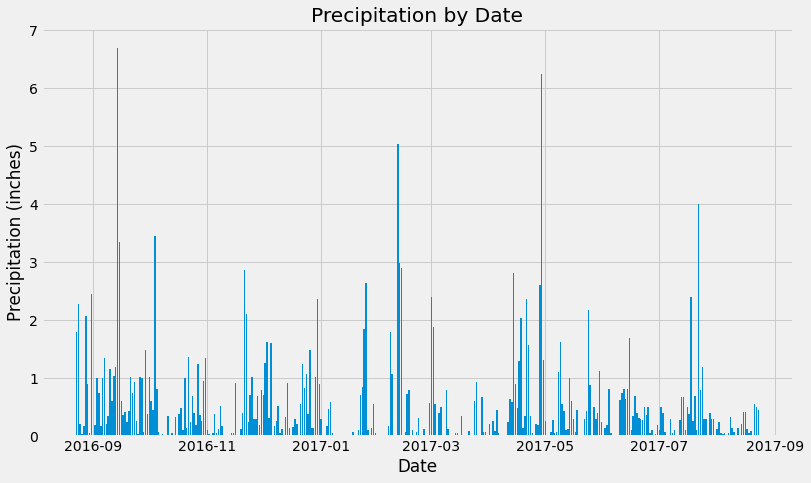

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = dt.datetime(2017, 8, 23)

# Calculate the date one year from the last date in data set - 2016 was a leap year
recent_year = date - dt.timedelta(days = 366)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= recent_year).order_by(Measurement.date).all()

#Save date and precipitation data in lists
date = [result[0] for result in results]
precipitation = [result[1] for result in results]

# Save the query results as a Pandas DataFrame and set the index to the date column
precip = pd.DataFrame({"Date": date,
                      "Precipitation": precipitation})

#Convert date column to datetime
precip["Date"]= pd.to_datetime(precip["Date"])

#Set date column as index
precip_df = precip.set_index("Date")

# Sort the dataframe by date
precip_df = precip.sort_values("Date") 

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize =(12, 7))
plt.bar(precip["Date"], precip["Precipitation"])
plt.title("Precipitation by Date")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.grid(True)
plt.show()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [12]:
# Close Session
session.close()